# Matplotlib Assignment

1.We have the min and max temperatures in a city In India for each months of the year.  We would like to find a function to  describe this and show it graphically, the dataset  given below. <br/>
 Task: 
     1.fitting it to the periodic function<br/>
     2.plot the fit<br/>
 
  Data 

   Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
    
   Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


In [63]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import pandas as pd

%matplotlib inline

In [37]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

x = np.arange(12)

In [40]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, x,
                                      max_temp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps,x,
                                      min_temp, [-40, 20, 0])

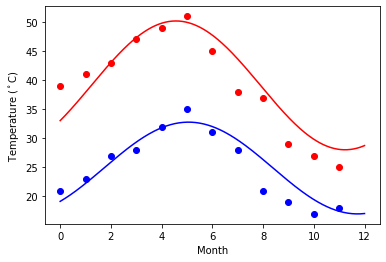

In [42]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(x,max_temp,'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(x,min_temp,'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

This assignment is for visualization using matplotlib: 
data to use: 

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv <br/>

titanic = pd.read_csv(url) 
Charts to plot: 

1. Create a pie chart presenting the male/female proportion 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 


In [44]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [46]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
titanic.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

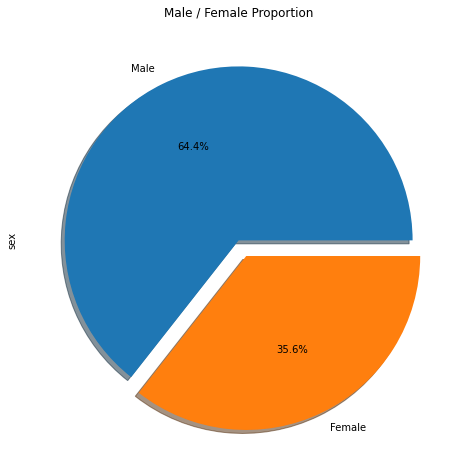

In [59]:
titanic['sex'].value_counts().plot.pie(labels = ['Male','Female'],figsize = (8,8),autopct='%1.1f%%',explode = [0,0.1],shadow=True)
plt.title('Male / Female Proportion')
plt.show()

No handles with labels found to put in legend.


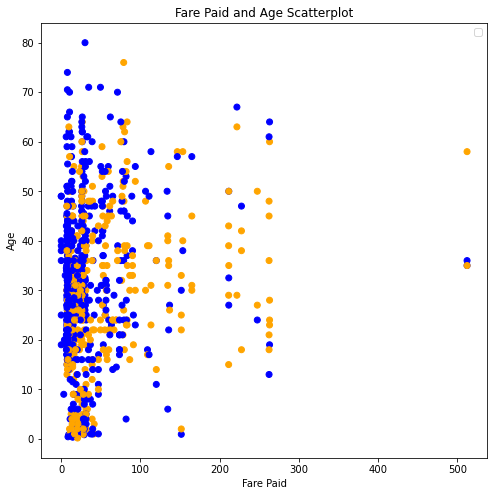

In [80]:
plt.figure(figsize = (8,8))
colors = np.array(['blue' if i == 'male' else 'orange' for i in titanic['sex']])
plt.scatter(titanic['fare'],titanic['age'],c = colors)

plt.title('Fare Paid and Age Scatterplot')
plt.xlabel('Fare Paid')
plt.ylabel('Age')


plt.show()
